In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import statsmodels.tsa.stattools as stools
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import coint_johansen


In [2]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33.00,50.72,49.67,34.37,42.13,24.85,17.15,45.52,31.03,51.68,...,77.37,35.49,28.30,27.78,69.38,27.57,67.43,16.06,83.25,27.50
996,32.88,50.78,49.55,34.35,41.60,24.84,16.94,46.13,30.77,53.43,...,77.48,35.85,28.13,28.00,69.31,27.61,67.96,16.10,83.26,27.41
997,32.59,51.01,49.88,33.72,41.58,25.00,16.88,45.61,31.16,52.48,...,77.71,36.26,27.72,27.94,69.20,27.45,66.92,16.22,83.37,27.45
998,32.57,50.73,50.18,34.24,41.52,25.01,16.69,45.75,31.52,52.33,...,77.28,36.39,27.74,27.85,68.93,27.29,66.85,16.00,83.32,27.54


In [3]:
train = data.iloc[:600]
test = data.iloc[600:]

In [4]:
train

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,35.56,54.13,43.30,32.20,48.11,26.61,20.48,62.17,39.26,60.68,...,75.37,41.80,38.53,27.13,73.56,28.75,68.72,17.80,78.39,32.86
596,35.32,54.19,42.84,31.67,48.08,26.78,20.84,61.32,38.72,60.37,...,75.69,41.57,38.31,27.36,73.30,28.97,68.95,17.79,78.78,32.61
597,35.36,54.80,42.45,31.83,48.11,26.85,20.67,61.65,38.75,59.02,...,75.60,41.46,38.89,26.96,72.75,29.02,68.78,17.49,79.38,32.60
598,35.28,55.10,42.63,32.42,48.29,26.75,20.32,62.48,38.69,58.42,...,75.09,41.60,38.65,27.12,72.46,28.94,69.50,17.27,80.40,32.38


In [5]:
test

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
600,35.08,55.15,42.11,32.06,47.01,26.62,20.47,61.16,39.11,57.79,...,75.45,41.73,38.73,26.54,72.86,28.91,70.03,17.24,80.57,32.14
601,35.05,54.61,42.99,31.56,47.44,26.49,20.41,62.47,38.58,56.75,...,76.13,41.88,38.62,26.31,73.11,29.03,70.86,17.15,80.87,32.10
602,35.32,54.72,42.40,30.94,47.27,26.47,20.16,62.28,38.48,58.04,...,76.89,41.84,39.54,26.40,73.73,28.90,70.52,17.31,81.25,31.82
603,35.50,54.80,42.09,31.04,47.29,26.40,20.02,62.46,38.10,57.80,...,76.75,41.25,39.93,26.49,74.41,28.84,70.67,17.27,80.88,32.20
604,35.56,55.15,42.11,30.73,46.92,26.58,20.02,60.91,38.19,58.25,...,76.57,42.21,39.96,26.96,73.54,28.92,69.93,17.24,80.96,32.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33.00,50.72,49.67,34.37,42.13,24.85,17.15,45.52,31.03,51.68,...,77.37,35.49,28.30,27.78,69.38,27.57,67.43,16.06,83.25,27.50
996,32.88,50.78,49.55,34.35,41.60,24.84,16.94,46.13,30.77,53.43,...,77.48,35.85,28.13,28.00,69.31,27.61,67.96,16.10,83.26,27.41
997,32.59,51.01,49.88,33.72,41.58,25.00,16.88,45.61,31.16,52.48,...,77.71,36.26,27.72,27.94,69.20,27.45,66.92,16.22,83.37,27.45
998,32.57,50.73,50.18,34.24,41.52,25.01,16.69,45.75,31.52,52.33,...,77.28,36.39,27.74,27.85,68.93,27.29,66.85,16.00,83.32,27.54


In [6]:
diction = {}
for i in range(50):
    for j in range(50):
        if i == j:
            continue
        coint_t, pvalue, crit_value = stools.coint(np.log(data[i]), np.log(data[j]), trend="ct", autolag="AIC")
        diction[i, j] = (coint_t, pvalue, crit_value)
        # Rough estimate for family rate 10%
        if pvalue < 8.42848604e-5:
            print(i, j)
with open("pairs.txt", "w") as fp:
    fp.write(str(diction))

6 42


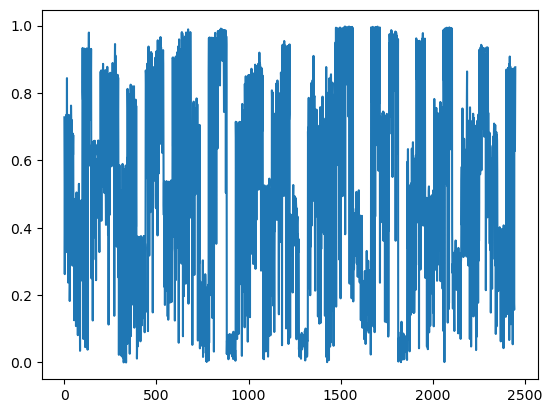

In [7]:
pvals = []
for pair, val in diction.items():
    pvals.append(val[1])
plt.plot(pvals)

In [8]:
all_pairs = list(diction.items())
all_pairs.sort(key=lambda x: x[1][1])
print(all_pairs)

[((6, 42), (np.float64(-5.714026948598065), np.float64(3.8135145159115434e-05), array([-4.3431099 , -3.79010222, -3.50340612]))), ((6, 29), (np.float64(-5.317502052991458), np.float64(0.000229284016686907), array([-4.3431099 , -3.79010222, -3.50340612]))), ((37, 15), (np.float64(-4.95985818058473), np.float64(0.001013057103561777), array([-4.3431099 , -3.79010222, -3.50340612]))), ((29, 6), (np.float64(-4.949506187572172), np.float64(0.0010554998700646337), array([-4.3431099 , -3.79010222, -3.50340612]))), ((42, 6), (np.float64(-4.9007477428072255), np.float64(0.001278643145592938), array([-4.3431099 , -3.79010222, -3.50340612]))), ((15, 39), (np.float64(-4.816774729455953), np.float64(0.001768533777561971), array([-4.3431099 , -3.79010222, -3.50340612]))), ((37, 1), (np.float64(-4.6906530438540655), np.float64(0.0028375938398729826), array([-4.3431099 , -3.79010222, -3.50340612]))), ((15, 37), (np.float64(-4.6077764011984765), np.float64(0.003834778409353711), array([-4.3431099 , -3.7

In [9]:
diction[(48, 49)]

(np.float64(-2.7432597561505787),
 np.float64(0.38781555349486363),
 array([-4.3431099 , -3.79010222, -3.50340612]))

In [10]:
sort_pval = sorted(pvals)
family_error = []
for i in range(50):
    family_error.append(1 - (1 - sort_pval[i])**1250)

In [11]:
family_error

[np.float64(0.0465514747012753),
 np.float64(0.24921644878711968),
 np.float64(0.7183142640305891),
 np.float64(0.7328838316940673),
 np.float64(0.7979674859819592),
 np.float64(0.8905868669038852),
 np.float64(0.97133373553979),
 np.float64(0.9917923409464863),
 np.float64(0.9986634764895558),
 np.float64(0.9990622720228718),
 np.float64(0.9995171822329311),
 np.float64(0.9998871029961328),
 np.float64(0.9999200286628492),
 np.float64(0.9999851978688723),
 np.float64(0.9999927499751629),
 np.float64(0.9999945535022666),
 np.float64(0.9999949486620832),
 np.float64(0.9999950212349795),
 np.float64(0.9999974414119495),
 np.float64(0.9999990343222609),
 np.float64(0.9999991771618932),
 np.float64(0.9999993364314657),
 np.float64(0.9999995355670198),
 np.float64(0.9999999939874311),
 np.float64(0.9999999946412631),
 np.float64(0.9999999985136968),
 np.float64(0.9999999990006244),
 np.float64(0.9999999995401752),
 np.float64(0.9999999996668237),
 np.float64(0.9999999997056641),
 np.float64

In [30]:
# Dig out the correlation between the two
A = 42
B = 6
x_with_const = sm.add_constant(train[A])
model = sm.OLS(train[B], x_with_const).fit()

In [31]:
print(model.params)
Beta = list(model.params)[1]
Beta

const    74.794597
42       -1.349178
dtype: float64


-1.3491778562567784

In [32]:
train_mean = np.mean(train[A] - Beta * train[B])
train_mean

np.float64(72.60288363242314)

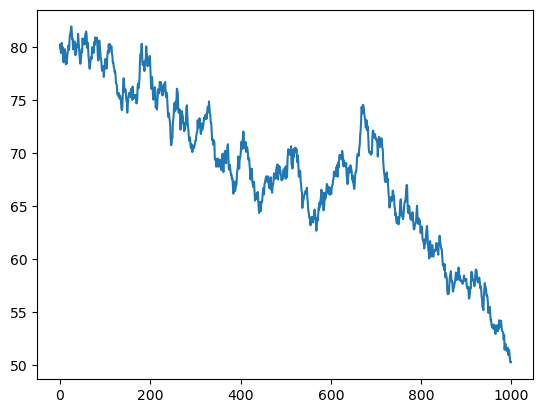

In [33]:
plt.plot(data[A] - Beta * data[B])

In [34]:
from statsmodels.tsa.api import VAR
model = VAR(data)
lag_order = model.select_order(maxlags=10)
print(lag_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        30.37       30.62   1.549e+13       30.47
1      -95.31*     -82.69*  4.083e-42*     -90.51*
2       -93.45      -68.47   2.692e-41      -83.95
3       -91.65      -54.30   1.774e-40      -77.45
4       -89.93      -40.22   1.165e-39      -71.03
5       -88.24      -26.16   8.360e-39      -64.63
6       -86.95      -12.50   4.649e-38      -58.64
7       -85.95      0.8726   2.349e-37      -52.94
8       -85.28       13.91   1.080e-36      -47.56
9       -85.15       26.41   3.898e-36      -42.73
10      -85.91       38.01   8.297e-36      -38.79
--------------------------------------------------


In [35]:
# Try the other johansen test
diction = {}
for i in range(50):
    for j in range(50):
        if i == j:
            continue
        result = coint_johansen(train[[i, j]], det_order=1, k_ar_diff=1)
        trace_0 = result.trace_stat[0]
        trace_crit_99 = result.trace_stat_crit_vals[0][2]
        if (trace_0 > trace_crit_99):
            print(i, j)
        diction[i, j] = result

1 15
1 33
1 37
2 6
2 7
2 8
2 11
2 15
2 18
2 19
2 20
2 22
2 25
2 26
2 29
2 30
2 33
2 34
2 35
2 36
2 37
2 40
2 43
2 45
2 46
2 48
2 49
4 33
6 2
6 7
6 8
6 11
6 13
6 18
6 20
6 26
6 29
6 33
6 35
6 37
6 42
6 45
6 47
6 48
7 2
7 6
7 8
7 10
7 11
7 15
7 18
7 22
7 25
7 35
7 36
7 37
7 45
7 48
8 2
8 6
8 7
8 10
10 7
10 8
10 28
11 2
11 6
11 7
11 18
11 26
11 29
11 33
11 35
11 37
11 44
11 48
13 6
13 18
15 1
15 2
15 7
15 20
15 25
15 34
15 37
15 48
15 49
18 2
18 6
18 7
18 11
18 13
18 21
18 22
18 29
18 33
18 34
18 35
18 37
18 38
18 41
18 46
18 48
19 2
19 26
19 46
19 49
20 2
20 6
20 15
20 26
20 30
20 33
20 37
20 48
21 18
22 2
22 7
22 18
22 33
22 35
22 37
22 43
22 48
22 49
25 2
25 7
25 15
25 33
25 37
25 48
25 49
26 2
26 6
26 11
26 19
26 20
26 35
28 10
29 2
29 6
29 11
29 18
30 2
30 20
33 1
33 2
33 4
33 6
33 11
33 18
33 20
33 22
33 25
33 35
33 37
33 48
33 49
34 2
34 15
34 18
34 37
35 2
35 6
35 7
35 11
35 18
35 22
35 26
35 33
35 48
36 2
36 7
37 1
37 2
37 6
37 7
37 11
37 15
37 18
37 20
37 22
37 25
37 33
37 34
37